# MLDM GROUP COURSEWORK (COMM055) - NIMISHA RAJESH 6829882

## 1) Introduction

-This coursework's aim is to evaluate the efficiency of numerous algorithms for machine learning by applying them to a real-world dataset.<br>
-There are countless objects in outer space, some of which are closer to Earth than we might realize. <br>
-A distance of 70,000 km might seem large, but in astronomical terms, it's quite minimal and could disrupt various natural processes. Therefore, these nearby objects or asteroids could pose a threat. <br>
-It's prudent to be aware of our cosmic surroundings and identify which of these NASA-tracked near-Earth objects could be dangerous. This dataset gathers information on asteroids classified by NASA as being in close proximity to Earth.<br>

# 2) Aim

-To preprocess the dataset and prepare it for machine learning models. <br>
-To implement and evaluate multiple machine learning algorithms.<br>
-To compare the performance of these algorithms using various metrics such as accuracy, precision, recall, F1-score, and confusion matrices.<br>
-To visualize the results and draw meaningful conclusions.<br>

# 3) Importing Libraries

In [2]:
#Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    roc_curve, roc_auc_score, accuracy_score, auc, 
    confusion_matrix, ConfusionMatrixDisplay, classification_report
)
from matplotlib import pyplot 
from imblearn.over_sampling import RandomOverSampler

# 4) Loading the dataset

In [3]:
#Load the dataset
df=pd.read_csv("neo.csv")

In [4]:
df

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True
...,...,...,...,...,...,...,...,...,...,...
90831,3763337,(2016 VX1),0.026580,0.059435,52078.886692,1.230039e+07,Earth,False,25.00,False
90832,3837603,(2019 AD3),0.016771,0.037501,46114.605073,5.432121e+07,Earth,False,26.00,False
90833,54017201,(2020 JP3),0.031956,0.071456,7566.807732,2.840077e+07,Earth,False,24.60,False
90834,54115824,(2021 CN5),0.007321,0.016370,69199.154484,6.869206e+07,Earth,False,27.80,False


In [5]:
print(df.count())

id                    90836
name                  90836
est_diameter_min      90836
est_diameter_max      90836
relative_velocity     90836
miss_distance         90836
orbiting_body         90836
sentry_object         90836
absolute_magnitude    90836
hazardous             90836
dtype: int64


In [6]:
# Randomly select 15,000 rows from the dataset
sampled_data = df.sample(n=15000, random_state=42)

# Display the first few rows of the sampled dataset to confirm
print(sampled_data.head())

            id               name  est_diameter_min  est_diameter_max  \
20406  3943344         (2019 YT1)          0.024241          0.054205   
74443  3879239          (2019 US)          0.012722          0.028447   
74306  3879244          (2019 UU)          0.013322          0.029788   
45943  2481965  481965 (2009 EB1)          0.193444          0.432554   
62859  3789471         (2017 WJ1)          0.044112          0.098637   

       relative_velocity  miss_distance orbiting_body  sentry_object  \
20406       22148.962596   5.028574e+07         Earth          False   
74443       26477.211836   1.683201e+06         Earth          False   
74306       33770.201397   3.943220e+06         Earth          False   
45943       43599.575296   7.346837e+07         Earth          False   
62859       36398.080883   6.352916e+07         Earth          False   

       absolute_magnitude  hazardous  
20406               25.20      False  
74443               26.60      False  
74306      

# 5) Exploratory Data Analysis

## 5.1) Seaborn Pairplot : Analyzing Near-Earth Object Data

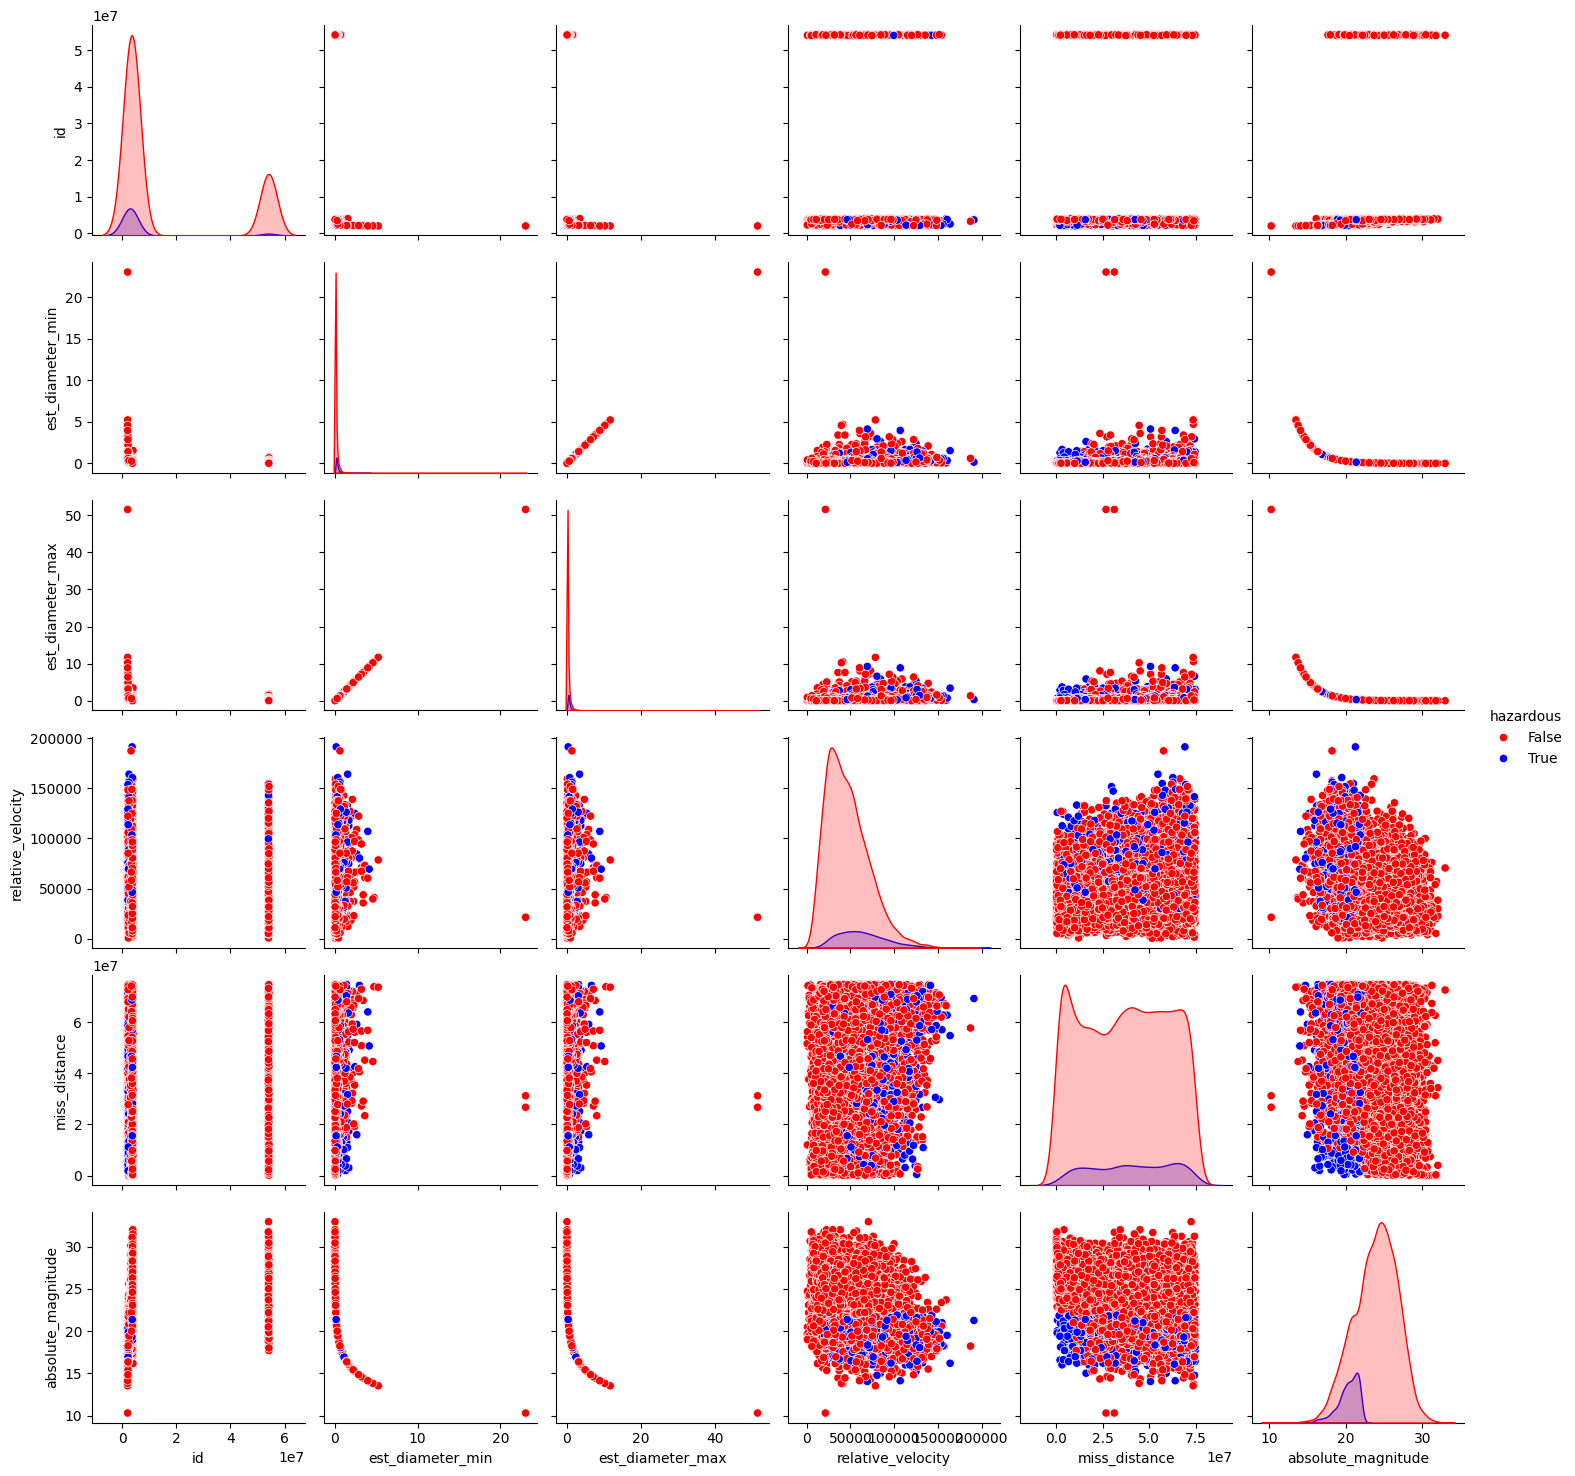

In [7]:
columns_to_check = ['id','est_diameter_min', 'est_diameter_max', 'relative_velocity', 'miss_distance', 'absolute_magnitude']

existing_columns = [col for col in columns_to_check if col in sampled_data.columns]
existing_columns.append('hazardous') 
palette = {0: "red", 1: "blue"}
sns.pairplot(sampled_data[existing_columns], hue='hazardous', palette=palette)
plt.show()


## 5.2) Histograms : Visualizing Distributions of Near-Earth Object Characteristics

Index(['id', 'name', 'est_diameter_min', 'est_diameter_max',
       'relative_velocity', 'miss_distance', 'orbiting_body', 'sentry_object',
       'absolute_magnitude', 'hazardous'],
      dtype='object')


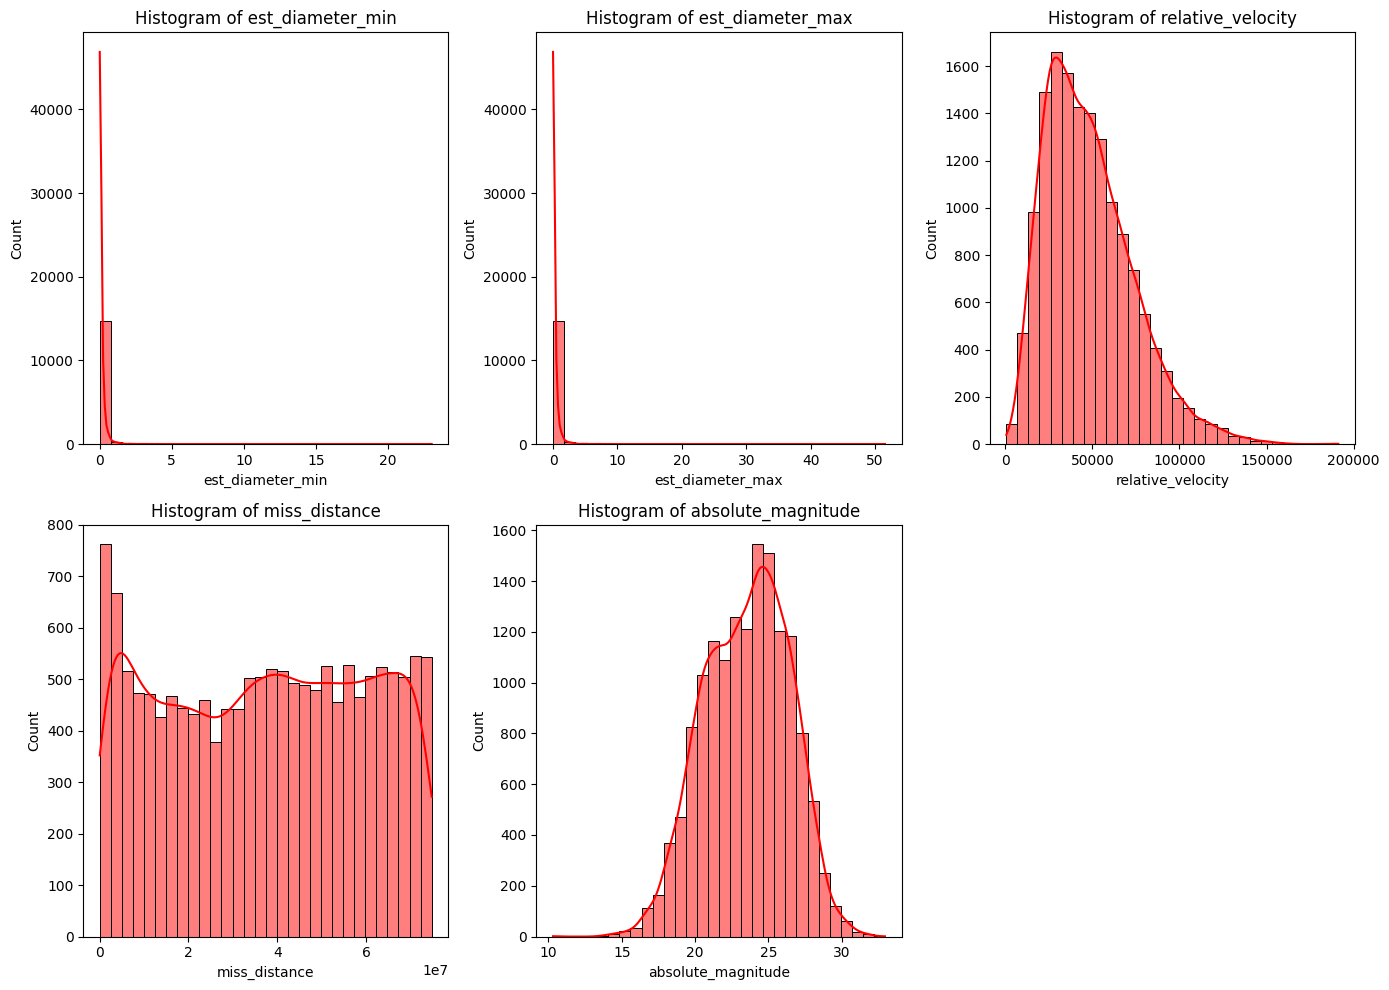

In [8]:
print(sampled_data.columns)

# Define the columns you want to plot
columns_to_check = ['est_diameter_min', 'est_diameter_max', 'relative_velocity', 'miss_distance', 'absolute_magnitude']

# Plot histograms
plt.figure(figsize=(14, 10))
for i, column in enumerate(columns_to_check):
    if column in sampled_data.columns:
        plt.subplot(2, 3, i+1)  
        sns.histplot(sampled_data[column], bins=30, kde=True, color='red')  # Adding color parameter here
        plt.title(f'Histogram of {column}')
plt.tight_layout()
plt.show()


## 5.3) Scatter Plot : Analysis of Near-Earth Object Features Against Hazardous Status


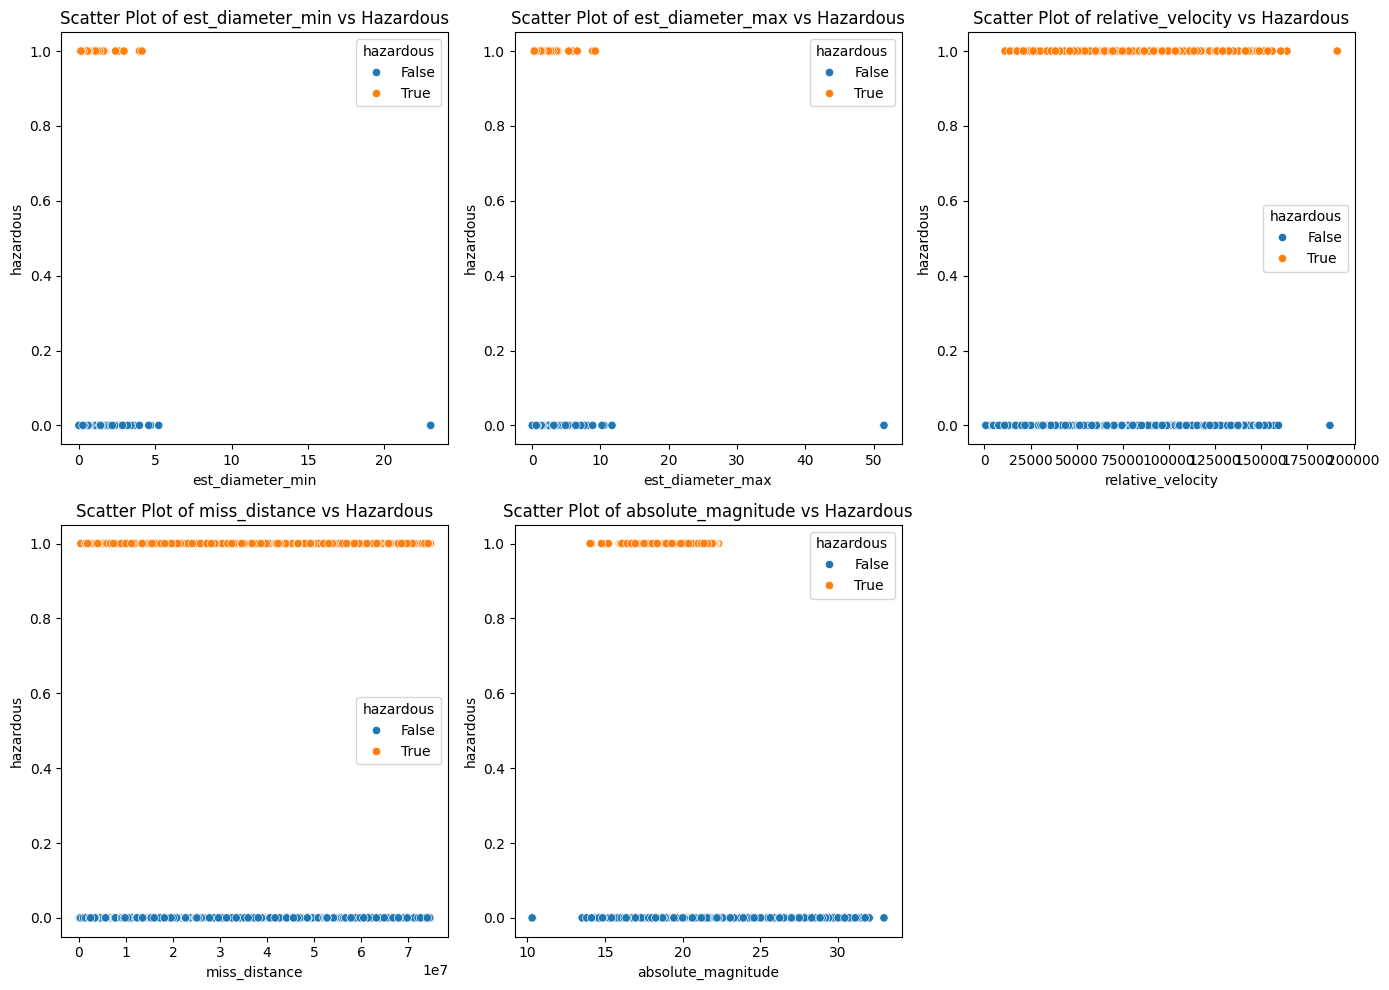

In [9]:
plt.figure(figsize=(14, 10))
for i, column in enumerate(['est_diameter_min','est_diameter_max', 'relative_velocity', 'miss_distance', 'absolute_magnitude']):
    plt.subplot(2, 3, i+1)
    sns.scatterplot(x=sampled_data[column], y=sampled_data['hazardous'], hue=sampled_data['hazardous'])
    plt.title(f'Scatter Plot of {column} vs Hazardous')
plt.tight_layout()
plt.show()

In [10]:
print(sampled_data.count())

id                    15000
name                  15000
est_diameter_min      15000
est_diameter_max      15000
relative_velocity     15000
miss_distance         15000
orbiting_body         15000
sentry_object         15000
absolute_magnitude    15000
hazardous             15000
dtype: int64


In [11]:
sampled_data.columns

Index(['id', 'name', 'est_diameter_min', 'est_diameter_max',
       'relative_velocity', 'miss_distance', 'orbiting_body', 'sentry_object',
       'absolute_magnitude', 'hazardous'],
      dtype='object')

In [12]:
sampled_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15000 entries, 20406 to 25327
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  15000 non-null  int64  
 1   name                15000 non-null  object 
 2   est_diameter_min    15000 non-null  float64
 3   est_diameter_max    15000 non-null  float64
 4   relative_velocity   15000 non-null  float64
 5   miss_distance       15000 non-null  float64
 6   orbiting_body       15000 non-null  object 
 7   sentry_object       15000 non-null  bool   
 8   absolute_magnitude  15000 non-null  float64
 9   hazardous           15000 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 1.1+ MB


In [13]:
sampled_data.describe()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,1.500000e+04,15000.000000,15000.000000,15000.000000,1.500000e+04,15000.000000
mean,1.445551e+07,0.130475,0.291752,48075.429043,3.718079e+07,23.518676
std,2.092498e+07,0.356522,0.797208,25223.600195,2.237306e+07,2.896755
min,2.000433e+06,0.000683,0.001528,561.695602,9.426685e+03,10.310000
25%,3.447687e+06,0.019256,0.043057,28638.318054,1.733843e+07,21.320000
50%,3.748230e+06,0.048368,0.108153,44167.101928,3.792752e+07,23.700000
75%,3.879715e+06,0.144729,0.323623,63143.241888,5.664576e+07,25.700000
max,5.427276e+07,23.043847,51.527608,191176.458196,7.478516e+07,32.950000


# 6) Data Preprocessing

## 6.1) Null Values Check

In [14]:
sampled_data.isnull().sum()

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64

## 6.2) Duplicate Values Check

In [15]:
# Check for duplicate rows
duplicates = sampled_data.duplicated()
print("Number of duplicate entries:", duplicates.sum())

Number of duplicate entries: 0


## 6.3) Detecting Outliers

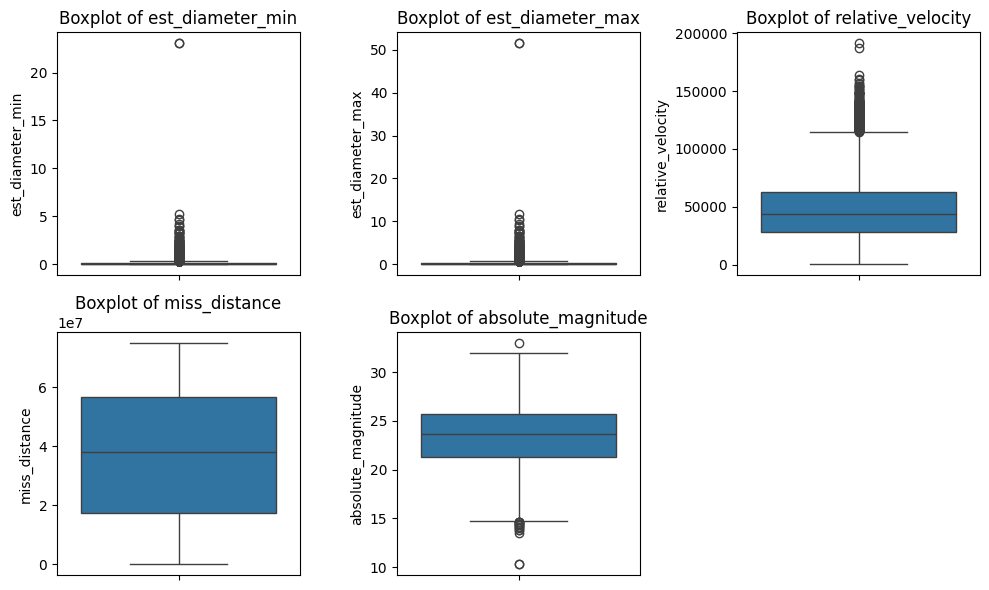

Outliers in est_diameter_min:
            id                 name  est_diameter_min  est_diameter_max  \
73987  2354030   354030 (2001 RB18)          0.515887          1.153559   
23141  2506859  506859 (2007 VW137)          0.606115          1.355314   
61060  2463664   463664 (2014 JY24)          0.506471          1.132505   
19027  3367152          (2007 BB50)          0.530341          1.185878   
70197  2253106    253106 (2002 UR3)          1.278071          2.857854   
...        ...                  ...               ...               ...   
60667  3572706            (2011 OB)          0.366906          0.820427   
71029  2349068   349068 (2006 YT13)          0.565659          1.264853   
54894  2523803    523803 (1999 RV2)          0.483676          1.081534   
8297   2163692   163692 (2003 CY18)          0.592318          1.324463   
50999  2490684   490684 (2010 LL34)          0.345585          0.772752   

       relative_velocity  miss_distance orbiting_body  sentry_object 

In [16]:
# List of columns to check for outliers
columns_to_check = ['est_diameter_min', 'est_diameter_max', 'relative_velocity', 'miss_distance', 'absolute_magnitude']

# Visual Inspection using Boxplots
plt.figure(figsize=(10, 6))
for i, column in enumerate(columns_to_check):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=sampled_data[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

# Statistical Outlier Detection using IQR
def detect_outliers(data, column_name):
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]
    return outliers

# Displaying outliers for each column
for column in columns_to_check:
    outliers = detect_outliers(sampled_data, column)
    print(f"Outliers in {column}:")
    print(outliers)
    print("\n")


## 6.4) Dropping Columns

In [18]:
sampled_data.drop(["est_diameter_min", "name", "orbiting_body", "sentry_object"], axis=1, inplace=True)
sampled_data.head()

,id,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
20406,3943344,0.054205,22148.962596,5.028574e+07,25.20,False
74443,3879239,0.028447,26477.211836,1.683201e+06,26.60,False
74306,3879244,0.029788,33770.201397,3.943220e+06,26.50,False
45943,2481965,0.432554,43599.575296,7.346837e+07,20.69,False
62859,3789471,0.098637,36398.080883,6.352916e+07,23.90,False


## 6.5) Conversion of Categorical Column to Numerical Column

In [20]:
# Map 'True' and 'False' to 1 and 0
sampled_data['hazardous'] = sampled_data['hazardous'].map({True: 1, False: 0})
sampled_data.head()

,id,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
20406,3943344,0.054205,22148.962596,5.028574e+07,25.20,0
74443,3879239,0.028447,26477.211836,1.683201e+06,26.60,0
74306,3879244,0.029788,33770.201397,3.943220e+06,26.50,0
45943,2481965,0.432554,43599.575296,7.346837e+07,20.69,0
62859,3789471,0.098637,36398.080883,6.352916e+07,23.90,0


In [24]:
sampled_data['hazardous'].value_counts()
#sampled_data=df.copy(data_transformed)

hazardous
0    13588
1     1412
Name: count, dtype: int64

## 6.6) Correlation Matrix

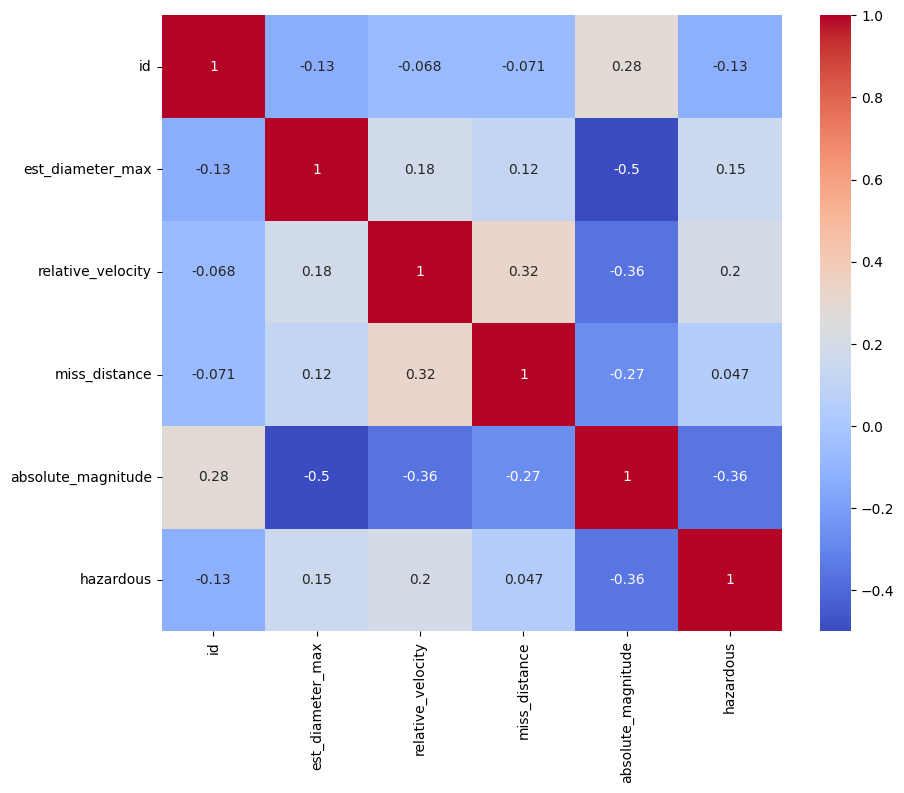

In [25]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
corr_matrix = sampled_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

## 6.7) Handling Outliers

In [27]:
def log_transform(df, column):
    df[column] = np.log1p(df[column])  
    return df

# Apply log transformation if applicable
#data_transformed = log_transform(sampled_data, 'est_diameter_min')
data_transformed = log_transform(sampled_data, 'est_diameter_max')
data_transformed = log_transform(sampled_data, 'relative_velocity')
data_transformed = log_transform(sampled_data, 'absolute_magnitude')


In [28]:
data_transformed #after handling the outliers

,id,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
20406,3943344,0.052787,10.005591,5.028574e+07,3.265759,0
74443,3879239,0.028050,10.184077,1.683201e+06,3.317816,0
74306,3879244,0.029353,10.427364,3.943220e+06,3.314186,0
45943,2481965,0.359459,10.682826,7.346837e+07,3.076851,0
62859,3789471,0.094070,10.502299,6.352916e+07,3.214868,0
...,...,...,...,...,...,...
75461,54195863,0.033025,10.363763,6.323601e+07,3.304686,0
60254,3771588,0.069019,11.475897,6.055246e+07,3.242592,0
50999,2490684,0.572533,10.852315,5.276037e+07,3.017004,0
1679,3748491,0.012919,9.302067,9.836948e+06,3.377588,0


# 7) Modeling

## 7.1) Distribution before Oversampling

<Axes: ylabel='count'>

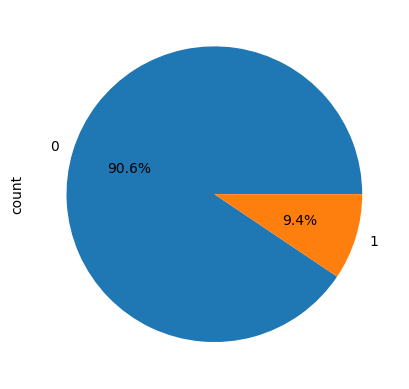

In [29]:
data_transformed['hazardous'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [30]:
X = data_transformed.iloc[:, :-1]
y = data_transformed.iloc[:, -1]


## 7.2) Train-test Split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
class_counts = y_train.value_counts()
total_samples = len(y_train)

# Calculate percentages
class_percentages = class_counts / total_samples * 100

# Print the class distribution in percentage
print("Class distribution in y_train before oversampling:")
print(class_percentages)


Class distribution in y_train before oversampling:
hazardous
0    90.716667
1     9.283333
Name: count, dtype: float64


In [33]:
ros = RandomOverSampler(random_state=123)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

## 7.3) Imbalance Check-  Oversampling

Class distribution in y_train after oversampling:
hazardous
0    50.0
1    50.0
Name: count, dtype: float64


<Axes: ylabel='count'>

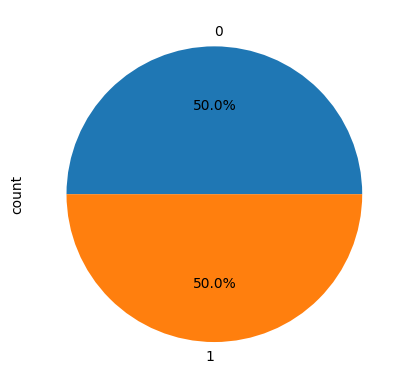

In [34]:
# Assuming y_train is your target variable series from the train_test_split
class_counts = y_train_resampled.value_counts()
total_samples = len(y_train_resampled)

# Calculate percentages
class_percentages = class_counts / total_samples * 100

# Print the class distribution in percentage
print("Class distribution in y_train after oversampling:")
print(class_percentages)

y_train_resampled.value_counts().plot(kind='pie',autopct='%0.1f%%')

## 7.4) Scaling

In [35]:
#feature scaling
sc = StandardScaler()
X_train_resampled = sc.fit_transform(X_train_resampled)
X_test = sc.transform(X_test)


## 7.5) General implementation of MLP Classifier

Training Accuracy: 0.883
Testing Accuracy: 0.786
Classification Report for Training Data:
              precision    recall  f1-score   support

           0       0.99      0.78      0.87     10886
           1       0.82      0.99      0.89     10886

    accuracy                           0.88     21772
   macro avg       0.90      0.88      0.88     21772
weighted avg       0.90      0.88      0.88     21772

Classification Report for Testing Data:
              precision    recall  f1-score   support

           0       1.00      0.77      0.87      2702
           1       0.31      0.98      0.48       298

    accuracy                           0.79      3000
   macro avg       0.66      0.87      0.67      3000
weighted avg       0.93      0.79      0.83      3000



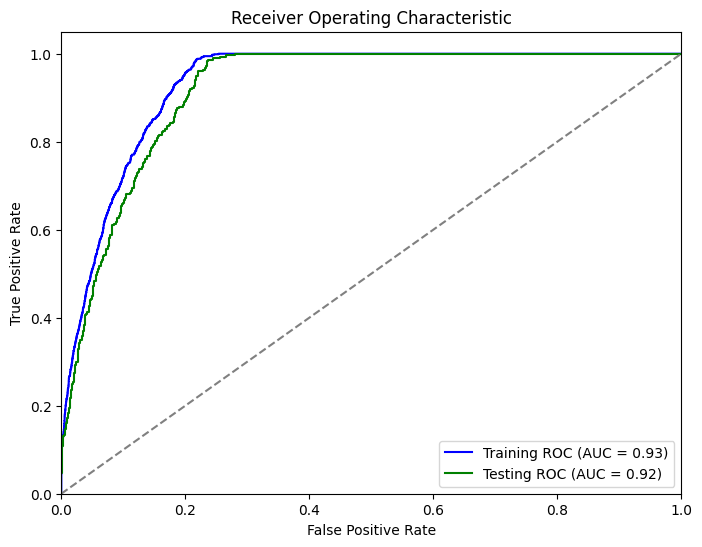

Confusion Matrix for Training Data:


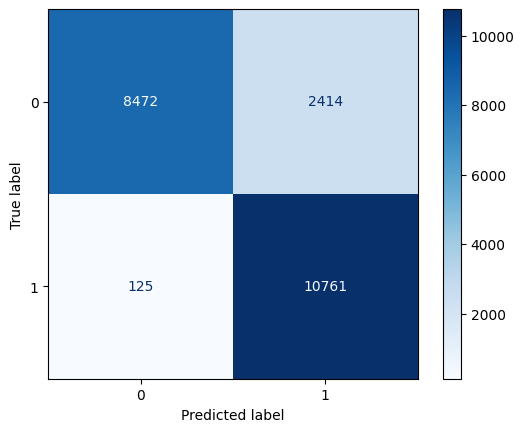

Confusion Matrix for Testing Data:


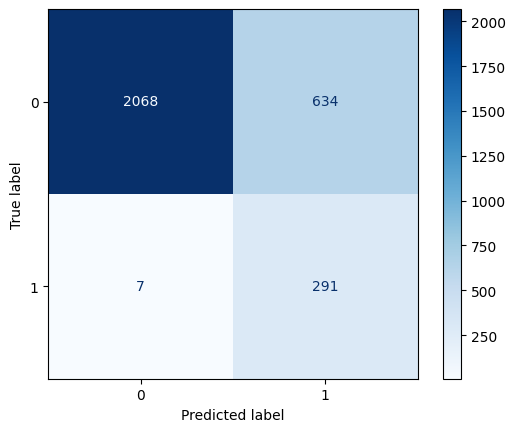

In [36]:
# Initialize the MLP classifier
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', max_iter=300, random_state=42)

# Train the model
mlp_model.fit(X_train_resampled, y_train_resampled)

# Predict the responses for the training and test set
train_predictions = mlp_model.predict(X_train_resampled)
test_predictions = mlp_model.predict(X_test)

# Predict probabilities for ROC
train_probs = mlp_model.predict_proba(X_train_resampled)[:, 1]
test_probs = mlp_model.predict_proba(X_test)[:, 1]
# Calculate accuracies
train_accuracy = accuracy_score(y_train_resampled, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

# Print accuracies
print(f"Training Accuracy: {train_accuracy:.3f}")
print(f"Testing Accuracy: {test_accuracy:.3f}")
# Print classification reports
print("Classification Report for Training Data:")
print(classification_report(y_train_resampled, train_predictions))
print("Classification Report for Testing Data:")
print(classification_report(y_test, test_predictions))
# Function to plot ROC Curve
def plot_roc_curve(fpr, tpr, roc_auc, title='ROC Curve'):
    plt.figure()
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

# Calculate ROC AUC for training and testing
fpr_train, tpr_train, _ = roc_curve(y_train_resampled, train_probs)
roc_auc_train = auc(fpr_train, tpr_train)
fpr_test, tpr_test, _ = roc_curve(y_test, test_probs)
roc_auc_test = auc(fpr_test, tpr_test)

# Function to plot ROC Curve
def plot_combined_roc_curve():
    plt.figure(figsize=(8, 6))
    plt.plot(fpr_train, tpr_train, label=f'Training ROC (AUC = {roc_auc_train:.2f})', color='blue')
    plt.plot(fpr_test, tpr_test, label=f'Testing ROC (AUC = {roc_auc_test:.2f})', color='green')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()


plot_combined_roc_curve()

# Display confusion matrices
cm_train = confusion_matrix(y_train_resampled, train_predictions)
cm_test = confusion_matrix(y_test, test_predictions)

print("Confusion Matrix for Training Data:")
ConfusionMatrixDisplay(cm_train).plot(cmap=plt.cm.Blues)
plt.show()

print("Confusion Matrix for Testing Data:")
ConfusionMatrixDisplay(cm_test).plot(cmap=plt.cm.Blues)
plt.show()


## 7.6) Cross-Validation and Evaluation of Multi-Layer Perceptron (MLP) Classifier

In this section, we evaluate the performance of the MLP classifier through cross-validation and various evaluation metrics.

**Data Preparation**:
- We begin by converting the training data (`X_train` and `y_train`) into pandas DataFrame format for ease of manipulation.

**Model Initialization**:
- We initialize the MLP classifier, which is a type of artificial neural network model capable of learning non-linear relationships in data.

**Cross-Validation**:
- To assess the generalization performance of the model, we employ 5-fold cross-validation, a common technique for estimating the performance of a machine learning model. This process involves dividing the dataset into five equal parts, training the model on four parts, and evaluating it on the fifth part. We repeat this process five times, each time using a different part as the test set.

**Evaluation Metrics**:
- We use accuracy as the evaluation metric during cross-validation. Accuracy measures the proportion of correctly classified instances out of all instances.

**Best Model Selection**:
- After cross-validation, we identify the model with the highest accuracy as the best model. This model demonstrates the best performance on average across the five folds.

**Model Fitting**:
- We fit the best MLP model on the entire training dataset to ensure it learns from the entire data distribution.

**Prediction and Evaluation**:
- Using the best model, we make predictions on the test set. We then compute various evaluation metrics such as confusion matrix, ROC curve, AUC (Area Under the Curve), and classification report to comprehensively assess the model's performance.

**Confusion Matrix**:
- The confusion matrix provides a tabular summary of the actual versus predicted class labels, enabling us to visualize the model's performance in terms of true positives, true negatives, false positives, and false negatives.

**ROC Curve and AUC**:
- The ROC curve plots the true positive rate (sensitivity) against the false positive rate (1 - specificity) for different threshold values, offering insights into the trade-off between sensitivity and specificity. The AUC represents the area under the ROC curve and provides a single scalar value to summarize the model's discriminative ability.

**Classification Report**:
- For each fold in the cross-validation process, we generate a classification report containing precision, recall, F1-score, and support for each class. This report offers a detailed breakdown of the model's performance across different classes, providing valuable insights into its strengths and weaknesses.

Through this rigorous evaluation process, we gain a comprehensive understanding of the MLP classifier's performance and its ability to generalize to unseen data.


Fold 1 Train Accuracy: 0.884
Fold 1 Test Accuracy: 0.880
Fold 1 Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.77      0.87      2178
           1       0.81      0.99      0.89      2177

    accuracy                           0.88      4355
   macro avg       0.90      0.88      0.88      4355
weighted avg       0.90      0.88      0.88      4355

Fold 2 Train Accuracy: 0.879
Fold 2 Test Accuracy: 0.892
Fold 2 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.79      0.88      2177
           1       0.83      0.99      0.90      2178

    accuracy                           0.89      4355
   macro avg       0.91      0.89      0.89      4355
weighted avg       0.91      0.89      0.89      4355

Fold 3 Train Accuracy: 0.882
Fold 3 Test Accuracy: 0.883
Fold 3 Classification Report:
              precision    recall  f1-score   support

           0       0.98      0

<Figure size 640x480 with 0 Axes>

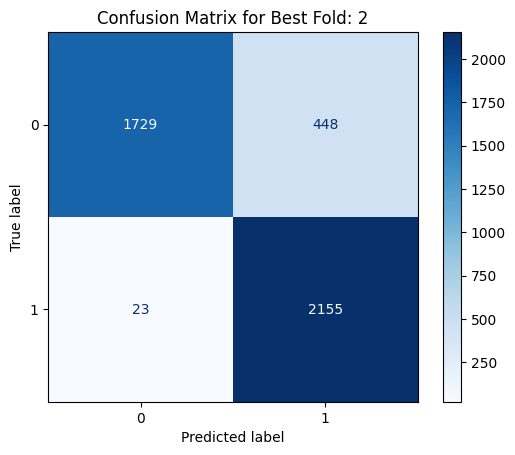

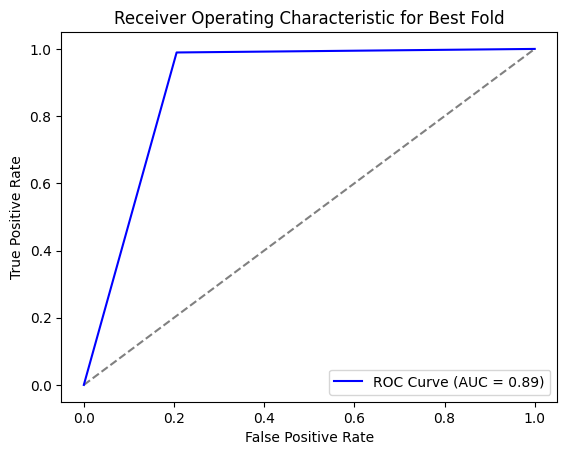

In [37]:
# Define the K-fold cross-validation configuration
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

best_accuracy = 0
best_fold = {}

# Loop through each fold
for i, (train_index, test_index) in enumerate(kf.split(X_train_resampled, y_train_resampled)):
    # Split data
    X_train_fold, X_test_fold = X_train_resampled[train_index], X_train_resampled[test_index]
    y_train_fold, y_test_fold = y_train_resampled[train_index], y_train_resampled[test_index]

    # Initialize and train the MLP Classifier
    mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', max_iter=300, random_state=42)
    mlp.fit(X_train_fold, y_train_fold)

    # Predict on the train and test data
    y_pred_train = mlp.predict(X_train_fold)
    y_pred_test = mlp.predict(X_test_fold)

    # Evaluate accuracy on both train and test datasets
    train_accuracy = accuracy_score(y_train_fold, y_pred_train)
    test_accuracy = accuracy_score(y_test_fold, y_pred_test)

    # Print train and test accuracies
    print(f"Fold {i + 1} Train Accuracy: {train_accuracy:.3f}")
    print(f"Fold {i + 1} Test Accuracy: {test_accuracy:.3f}")
    print(f"Fold {i + 1} Classification Report:")
    print(classification_report(y_test_fold, y_pred_test))

    # Check for the best test accuracy
    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        best_fold = {
            'fold_index': i + 1,
            'confusion_matrix': confusion_matrix(y_test_fold, y_pred_test),
            'fpr': roc_curve(y_test_fold, y_pred_test)[0],
            'tpr': roc_curve(y_test_fold, y_pred_test)[1],
            'roc_auc': auc(roc_curve(y_test_fold, y_pred_test)[0], roc_curve(y_test_fold, y_pred_test)[1])
        }

# Display results for the best fold
print(f"Best Fold: {best_fold['fold_index']}")
print(f"Best Accuracy: {best_accuracy:.3f}")

# Plot the confusion matrix for the best fold
plt.figure()
ConfusionMatrixDisplay(best_fold['confusion_matrix']).plot(cmap=plt.cm.Blues)
plt.title(f'Confusion Matrix for Best Fold: {best_fold["fold_index"]}')
plt.show()

# Plot ROC Curve for the best fold
plt.figure()
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.plot(best_fold['fpr'], best_fold['tpr'], color='blue',
         label=f"ROC Curve (AUC = {best_fold['roc_auc']:.2f})")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Best Fold')
plt.legend(loc="lower right")
plt.show()


## 7.7) Hyper parameter tuning MLP classifiers using ROC Curves

C:\Users\Nimisha Rajesh\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Nimisha Rajesh\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Baseline (random guess): ROC AUC=0.500
MLP 1 (hidden layer sizes=5, max_iter=100): ROC AUC=0.900
MLP 2 (hidden layer sizes=10, max_iter=100): ROC AUC=0.903
MLP 3 (hidden layer sizes=100, max_iter=1000): ROC AUC=0.911


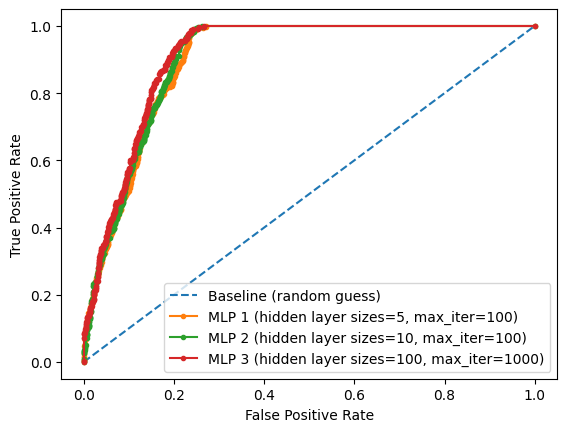

In [39]:
ns_probs = [0 for _ in range(len(y_test))]
from matplotlib import pyplot 

clf1 = MLPClassifier(random_state=0, activation='logistic', hidden_layer_sizes=(5,), max_iter=100)
clf1.fit(X_train_resampled, y_train_resampled)


clf2 = MLPClassifier(random_state=0, activation='logistic', hidden_layer_sizes=(10,), max_iter=100)
clf2.fit(X_train_resampled, y_train_resampled)


clf3 = MLPClassifier(random_state=0, activation='logistic', hidden_layer_sizes=(100,), max_iter=1000)
clf3.fit(X_train_resampled, y_train_resampled)

# Predict probabilities for different models
lr_probs1 = clf1.predict_proba(X_test)[:, 1]
lr_probs2 = clf2.predict_proba(X_test)[:, 1]
lr_probs3 = clf3.predict_proba(X_test)[:, 1]

# Calculate AUC score for random prediction model
ns_auc = roc_auc_score(y_test, ns_probs)

# Calculate AUC scores for MLP models
lr_auc1 = roc_auc_score(y_test, lr_probs1)
lr_auc2 = roc_auc_score(y_test, lr_probs2)
lr_auc3 = roc_auc_score(y_test, lr_probs3)

# Summarize scores
print('Baseline (random guess): ROC AUC=%.3f' % ns_auc)
print('MLP 1 (hidden layer sizes=5, max_iter=100): ROC AUC=%.3f' % lr_auc1)
print('MLP 2 (hidden layer sizes=10, max_iter=100): ROC AUC=%.3f' % lr_auc2)
print('MLP 3 (hidden layer sizes=100, max_iter=1000): ROC AUC=%.3f' % lr_auc3)

# Calculate ROC curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr1, lr_tpr1, _ = roc_curve(y_test, lr_probs1)
lr_fpr2, lr_tpr2, _ = roc_curve(y_test, lr_probs2)
lr_fpr3, lr_tpr3, _ = roc_curve(y_test, lr_probs3)

# Plot the ROC curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Baseline (random guess)')
pyplot.plot(lr_fpr1, lr_tpr1, marker='.', label='MLP 1 (hidden layer sizes=5, max_iter=100)')
pyplot.plot(lr_fpr2, lr_tpr2, marker='.', label='MLP 2 (hidden layer sizes=10, max_iter=100)')
pyplot.plot(lr_fpr3, lr_tpr3, marker='.', label='MLP 3 (hidden layer sizes=100, max_iter=1000)')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()
